# 📦 Procurement KPI Analysis: Unlocking Supplier Performance & Cost Efficiency

## 📌 Overview  
This project explores a Procurement KPI dataset to evaluate supplier performance, cost efficiency, and operational compliance. Using data science techniques, we uncover insights to support smarter purchasing decisions and vendor risk management.

---

## 📊 Exploratory Data Analysis (EDA)

### 🛒 Purchase & Pricing Patterns
- Analyzed **order quantities** by supplier and item category.
- Compared **unit price vs. negotiated price** to assess cost-saving effectiveness.

### ⏰ Delivery Performance
- Calculated **delivery delays** by comparing `Order_Date` and `Delivery_Date`.
- Identified trends in **late or cancelled orders** by supplier.

### ⚠️ Quality & Defect Rates
- Evaluated **defective units** distribution across suppliers.
- Investigated how **defect rate correlates with compliance**.

### 📦 Supplier Compliance
- Assessed supplier adherence to procurement policies.
- Explored relationships between **order status**, **compliance**, and **delivery issues**.

---

## 📚 Business & Operational Insights

- 💰 **Cost Optimization**: Significant price differences found between listed and negotiated rates.
- ⏳ **Late Deliveries**: Certain suppliers frequently miss deadlines, impacting procurement timelines.
- 🛑 **Defect Trends**: Specific categories and suppliers contribute disproportionately to defective items.
- 🚩 **Compliance Risk**: Non-compliance often aligns with higher delays and defect rates.

---

## 🤖 Predictive Modeling: Compliance Classification

### 🎯 Objective
Predict whether an order will be **compliant** based on supplier, pricing, and defect indicators.

### 🧠 Features Used
- Supplier, Item Category, Quantity
- Unit Price, Negotiated Price
- Delivery Delay (engineered)
- Defective Units

### ⚙️ Models
- Logistic Regression
- Decision Tree / Random Forest

### 💡 Outcome
Enable **risk-based supplier selection** and improve compliance rates by predicting non-compliant orders in advance.

---

## 🛠️ Tools & Technologies

- **Language:** Python  
- **Libraries:** pandas, numpy, matplotlib, seaborn, plotly, scikit-learn  
- **Techniques:**  
  - Feature Engineering (e.g., delays, price differences)  
  - KPI Dashboarding  
  - Binary Classification Modeling  
  - Data Visualization & Interpretation

---

## 📎 Dataset Summary

- **Observations:** 777 purchase orders  
- **Columns:** Supplier, Order_Date, Delivery_Date, Item_Category, Quantity, Prices, Defective_Units, Compliance  
- **Data Gaps:** Some missing values in `Delivery_Date` and `Defective_Units`

---

## 👩‍💻 Author

**Hilda Adina Rahmi**  
Data Scientist with a focus on turning procurement and operational data into actionable insights. Passionate about optimizing decision-making through analytics, machine learning, and smart dashboards.

---


In [ ]:
# 📦 Load the necessary libraries for Procurement KPI Analysis

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Time series tools (if used for delivery trend analysis)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# System & warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# 🗂️ Load dataset
df = pd.read_csv("Procurement KPI Analysis Dataset.csv")

# 👀 Preview the data
df.head()

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


In [ ]:
# Show basic info
print("📄 Data Info:")
df.info()

# Show shape and column names
print("\n🔢 Dataset Shape:", df.shape)
print("🧾 Column Names:", df.columns.tolist())

# Show first few rows
print("\n🔍 First 5 Rows:")
df.head()

📄 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PO_ID             777 non-null    object 
 1   Supplier          777 non-null    object 
 2   Order_Date        777 non-null    object 
 3   Delivery_Date     690 non-null    object 
 4   Item_Category     777 non-null    object 
 5   Order_Status      777 non-null    object 
 6   Quantity          777 non-null    int64  
 7   Unit_Price        777 non-null    float64
 8   Negotiated_Price  777 non-null    float64
 9   Defective_Units   641 non-null    float64
 10  Compliance        777 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 66.9+ KB

🔢 Dataset Shape: (777, 11)
🧾 Column Names: ['PO_ID', 'Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category', 'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price', 'Defective_Units', 'Compliance']

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


In [ ]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

PO_ID                 0
Supplier              0
Order_Date            0
Delivery_Date        87
Item_Category         0
Order_Status          0
Quantity              0
Unit_Price            0
Negotiated_Price      0
Defective_Units     136
Compliance            0
dtype: int64
           PO_ID         Supplier  Order_Date Delivery_Date    Item_Category  \
count        777              777         777           690              777   
unique       777                5         476           449                5   
top     PO-00777  Delta_Logistics  2022-09-29    2023-02-02  Office Supplies   
freq           1              171           6             4              174   
mean         NaN              NaN         NaN           NaN              NaN   
std          NaN              NaN         NaN           NaN              NaN   
min          NaN              NaN         NaN           NaN              NaN   
25%          NaN              NaN         NaN           NaN              NaN   
50%

In [ ]:
# --- Handle Defective_Units ---
# Fill missing defective units with 0 (assume no defect reported)
df["Defective_Units"] = df["Defective_Units"].fillna(0)

# --- Convert date columns ---
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Delivery_Date"] = pd.to_datetime(df["Delivery_Date"])

# --- Calculate Delivery Delay ---
df["Delivery_Delay"] = (df["Delivery_Date"] - df["Order_Date"]).dt.days

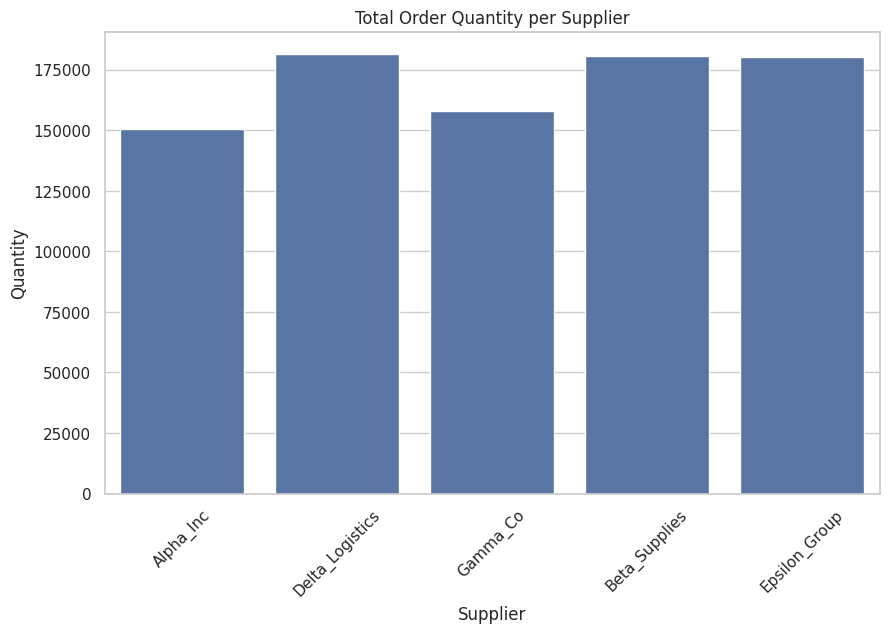

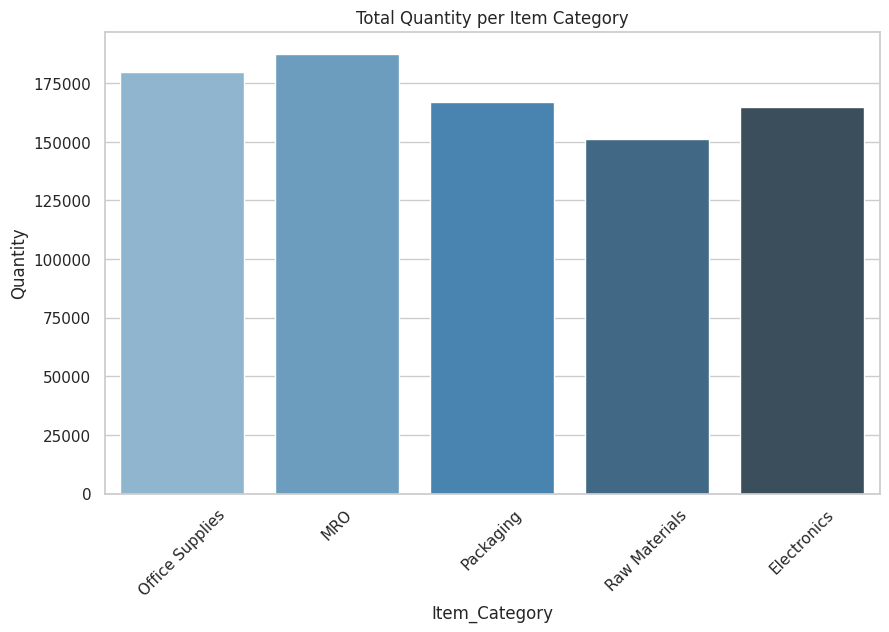

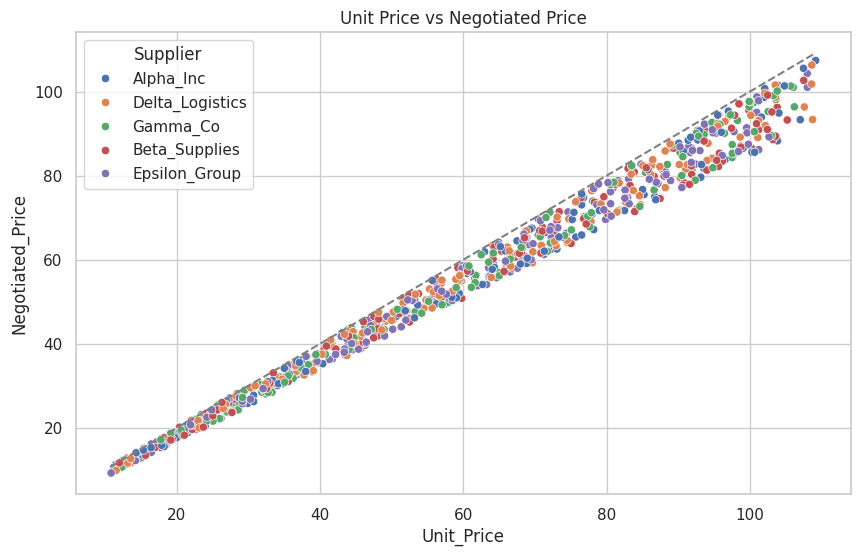

In [ ]:
# Order Quantity by Supplier
sns.barplot(data=df, x='Supplier', y='Quantity', estimator='sum', ci=None)
plt.title("Total Order Quantity per Supplier")
plt.xticks(rotation=45)
plt.show()

# Order Quantity by Item Category
sns.barplot(data=df, x='Item_Category', y='Quantity', estimator='sum', ci=None, palette='Blues_d')
plt.title("Total Quantity per Item Category")
plt.xticks(rotation=45)
plt.show()

# Unit Price vs Negotiated Price
sns.scatterplot(data=df, x='Unit_Price', y='Negotiated_Price', hue='Supplier')
plt.plot([df['Unit_Price'].min(), df['Unit_Price'].max()],
         [df['Unit_Price'].min(), df['Unit_Price'].max()], ls='--', c='gray')
plt.title("Unit Price vs Negotiated Price")
plt.show()

# 📦 Procurement Insights: Telling the Story Behind the Numbers

In a data-driven procurement environment, numbers are more than just metrics—they narrate the dynamics of supply chains, supplier performance, and negotiation strategies. Let's dive into the story told by our procurement data, visualized in three compelling charts.

---

## 1️⃣ Total Order Quantity per Supplier

🔍 **Key Observations:**
- **Delta_Logistics**, **Beta_Supplies**, and **Epsilon_Group** are leading suppliers with the highest order volumes, each handling over **175,000 units**.
- **Alpha_Inc**, in contrast, lags behind with approximately **150,000 units** ordered.
  
📘 **What this tells us:** These numbers are not just about quantity—they reflect **supplier capacity, trustworthiness, and past performance**. A high volume might indicate preferred vendor status, negotiated discounts, or long-term contracts.

---

## 2️⃣ Total Quantity per Item Category

🔍 **Key Observations:**
- **MRO (Maintenance, Repair, and Operations)** items are the most ordered, followed closely by **Office Supplies**.
- **Raw Materials** are ordered the least, suggesting possible stockpiling, fewer production cycles, or higher unit weight/value per order.

📘 **What this tells us:** Understanding procurement trends by item category helps us **prioritize vendor negotiations**, anticipate **budget allocation**, and design **stocking strategies**. MRO's high demand may indicate ongoing operational intensity and maintenance routines across departments.

---

## 3️⃣ Unit Price vs Negotiated Price (by Supplier)

🔍 **Key Observations:**
- Most points fall **below the diagonal line**, indicating that **negotiated prices are generally lower** than listed unit prices.
- All suppliers appear to participate in price negotiations, maintaining **competitive tension**.

📘 **What this tells us:** Procurement teams are successfully leveraging negotiation strategies. Suppliers like **Gamma_Co** and **Alpha_Inc** consistently provide discounts, which can have **a compound effect on overall cost savings** in large-volume purchases.

---

## 🎯 Final Takeaways

- **Supplier performance** is not just about volume—**pricing strategies and reliability** are equally critical.
- **High-demand categories** should receive targeted focus for cost-saving efforts and strategic sourcing.
- **Data storytelling** turns static charts into **actionable business intelligence**—driving smarter procurement decisions.

---

## ✅ Action Points for Stakeholders

1. **Audit contracts** with top-volume suppliers for optimization opportunities.
2. **Explore strategic partnerships** for MRO and Office Supplies.
3. **Institutionalize negotiation best practices** across teams to maximize savings.


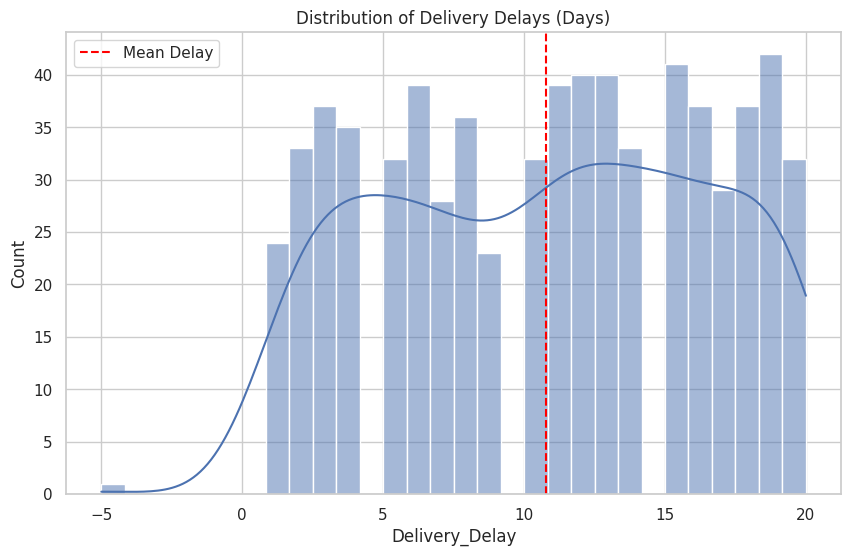

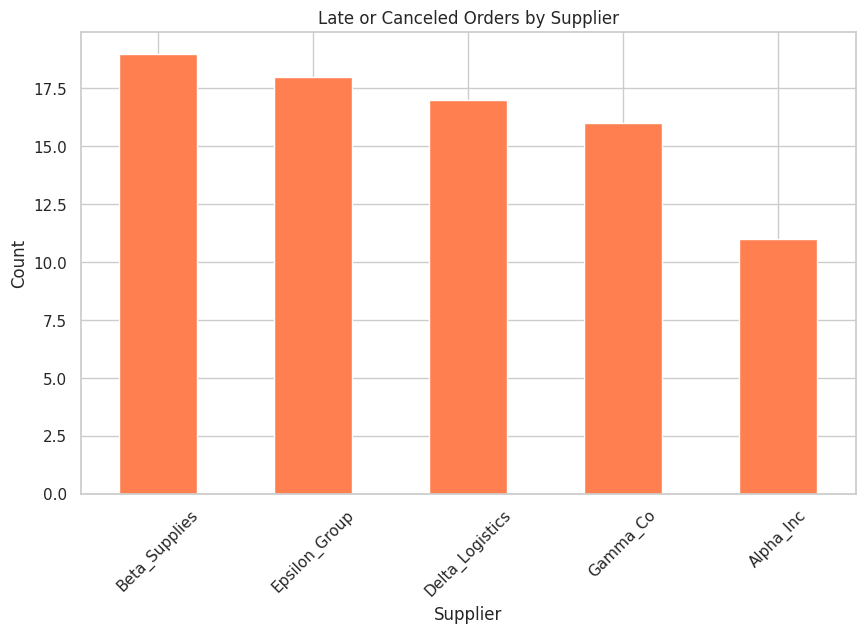

In [ ]:
# Histogram of Delivery Delay
sns.histplot(df['Delivery_Delay'], kde=True, bins=30)
plt.axvline(df['Delivery_Delay'].mean(), color='red', linestyle='--', label='Mean Delay')
plt.title("Distribution of Delivery Delays (Days)")
plt.legend()
plt.show()

# Late/Canceled Orders by Supplier
late_cancel = df[df['Order_Status'].isin(['Pending', 'Canceled'])]['Supplier'].value_counts()
late_cancel.plot(kind='bar', color='coral')
plt.title("Late or Canceled Orders by Supplier")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 📊 Uncovering Supplier Performance Through Delivery Insights

Efficient supply chains are built on reliability, yet even minor disruptions can ripple across operations. By analyzing supplier delivery patterns, we can identify key areas of risk and opportunities for improvement. Let’s dive into the data visualizations to uncover the full story.

---

## 📌 Chart 1: Late or Canceled Orders by Supplier

This bar chart reveals a clear discrepancy in performance across different suppliers. Among the five suppliers:

- **Beta_Supplies** tops the chart with the highest number of late or canceled orders, followed closely by **Epsilon_Group** and **Delta_Logistics**.
- **Gamma_Co** also contributes significantly, though slightly less.
- **Alpha_Inc** stands out as the most reliable supplier, with the fewest issues reported.

This pattern suggests that not all vendors are equally dependable. **Prioritizing partnerships with consistent performers like Alpha_Inc**, while **re-evaluating contracts or improving oversight with Beta_Supplies and Epsilon_Group**, could improve overall efficiency and reduce operational disruptions.

---

## ⏱️ Chart 2: Distribution of Delivery Delays (in Days)

This histogram provides a distributional view of delivery delays:

- The **delay values range from approximately -5 days (early deliveries) to 20 days (severe delays)**.
- The **red dashed line marks the average delay**, which hovers around **10–11 days**.
- The **shape of the distribution** appears slightly **right-skewed**, suggesting a larger number of deliveries suffer delays beyond the mean.
- The **density curve** overlaid on the histogram shows **multiple peaks**, indicating variability and possible subgroups of deliveries with consistent delay patterns.

This tells us that **while some deliveries are early or on time**, a significant portion tends to arrive **well after the expected date**, increasing inventory uncertainty and customer dissatisfaction.

---

## 🧠 Key Takeaways

1. **Supplier Monitoring Is Crucial**: The variability in late/canceled orders shows a clear need for better supplier performance tracking.
2. **Delays Are Common**: With many deliveries delayed beyond the mean, proactive logistics planning is essential.
3. **Data-Driven Action**:
   - Use these insights to **renegotiate terms** or introduce **performance incentives**.
   - Implement **predictive models** to anticipate delays based on historical trends.
   - Prioritize suppliers with strong track records to **mitigate risk**.

---

## 📣 Conclusion

This data tells a story beyond numbers—**a story of operational resilience, accountability, and continuous improvement**. By translating visual insights into strategic actions, businesses can transform logistical weaknesses into competitive strengths.


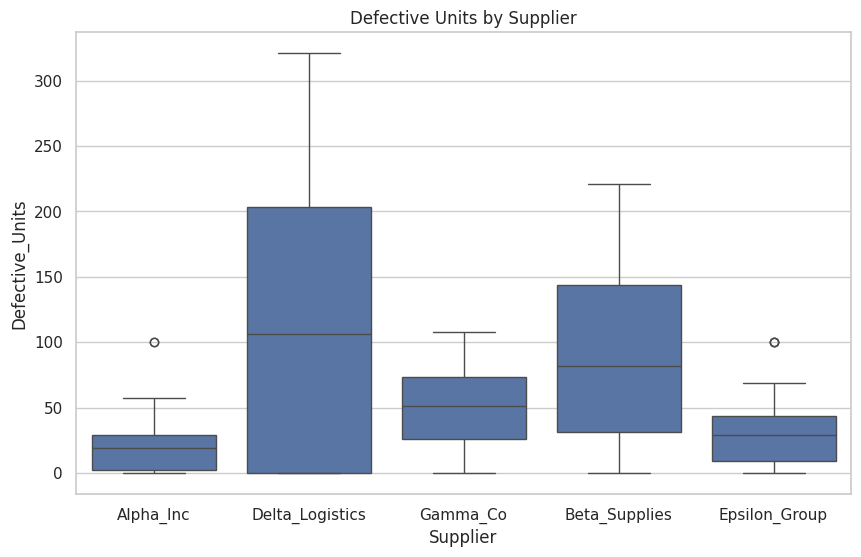

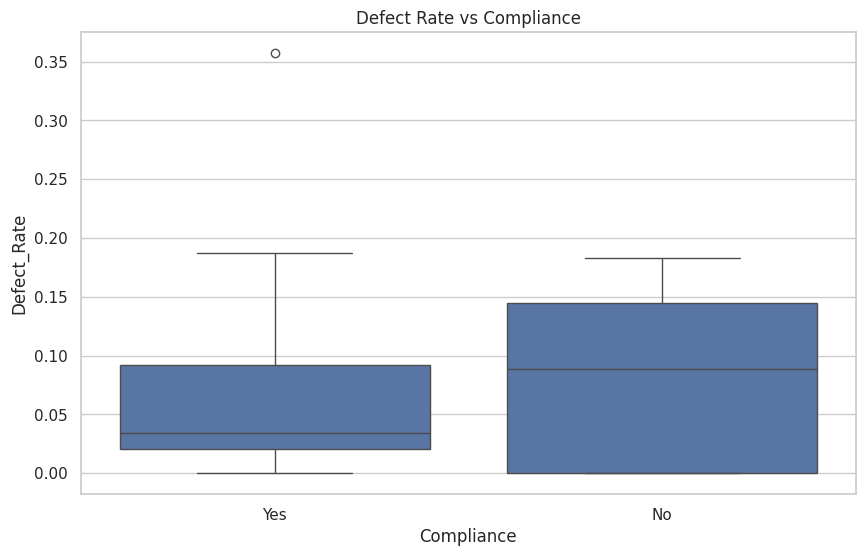

In [ ]:
# Defective Units per Supplier
sns.boxplot(data=df, x='Supplier', y='Defective_Units')
plt.title("Defective Units by Supplier")
plt.show()

# Defect Rate vs Compliance
df['Defect_Rate'] = df['Defective_Units'] / df['Quantity']
sns.boxplot(data=df, x='Compliance', y='Defect_Rate')
plt.title("Defect Rate vs Compliance")
plt.show()

# 📦 Supplier Performance Analysis Report

Understanding supplier performance is crucial for maintaining an efficient and reliable supply chain. This report provides a comprehensive view of supplier behavior based on delivery delays, order issues, defect quantities, and compliance adherence. The insights below are derived from four key visualizations.

---

## 🚚 Late or Canceled Orders by Supplier

The bar chart highlights the number of late or canceled orders across different suppliers.

- **Beta_Supplies** and **Epsilon_Group** top the list with the highest number of problematic orders, suggesting potential operational inefficiencies or logistical issues.
- **Alpha_Inc**, in contrast, has the fewest disruptions, pointing to stronger reliability.

This indicates a need to further investigate the processes of suppliers with frequent delays and possibly re-evaluate contract terms or penalties.

---

## ⏱️ Distribution of Delivery Delays

A histogram with KDE overlay shows the spread of delivery delays (in days).

- Delivery delays are generally spread between 0 and 20 days, with a noticeable **mean delay around 10 days**, marked by a red dashed line.
- The distribution is slightly bimodal, hinting at two clusters of suppliers — one with better performance and another consistently underperforming.

Delays significantly above the average should trigger supplier performance reviews, while those near or below the mean represent more dependable vendors.

---

## 🏭 Defective Units by Supplier

The boxplot reveals the quantity of defective units reported from each supplier.

- **Delta_Logistics** shows extreme variability, with a high median and wide spread of defective products — a clear outlier.
- **Alpha_Inc** and **Epsilon_Group** maintain lower and more consistent defect levels.

This highlights a **serious quality concern** with Delta_Logistics and justifies prioritizing quality control audits or supplier substitution if issues persist.

---

## ✅ Defect Rate vs Compliance

The final visualization compares defect rates based on supplier compliance.

- Suppliers marked as **compliant ("Yes")** have significantly **lower and more stable defect rates**.
- Non-compliant suppliers show higher medians and wider interquartile ranges, indicating inconsistency and greater quality risks.

This reinforces the value of enforcing compliance standards, as it is closely tied to better performance and product integrity.

---

## 📌 Conclusion & Recommendations

- **Alpha_Inc** stands out as the most consistent and reliable supplier across all metrics.
- **Delta_Logistics**, despite being active, shows poor performance in both delivery and quality, warranting immediate action.
- Emphasizing **compliance enforcement** across all suppliers can dramatically improve defect rates and overall quality.
- Companies should consider developing a **supplier scorecard system** combining these metrics to guide strategic decisions and mitigate supply chain risk.

By leveraging data visualizations and continuous monitoring, businesses can foster a more accountable, efficient, and high-performing supplier ecosystem.


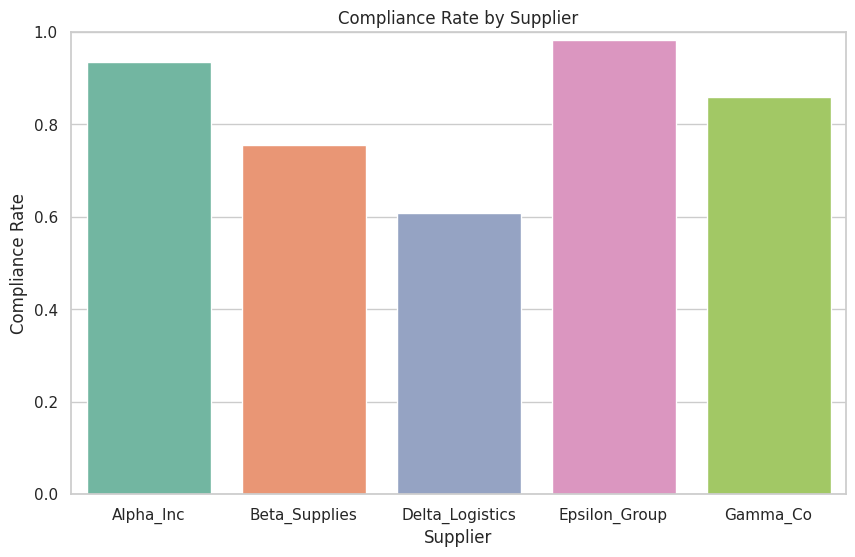

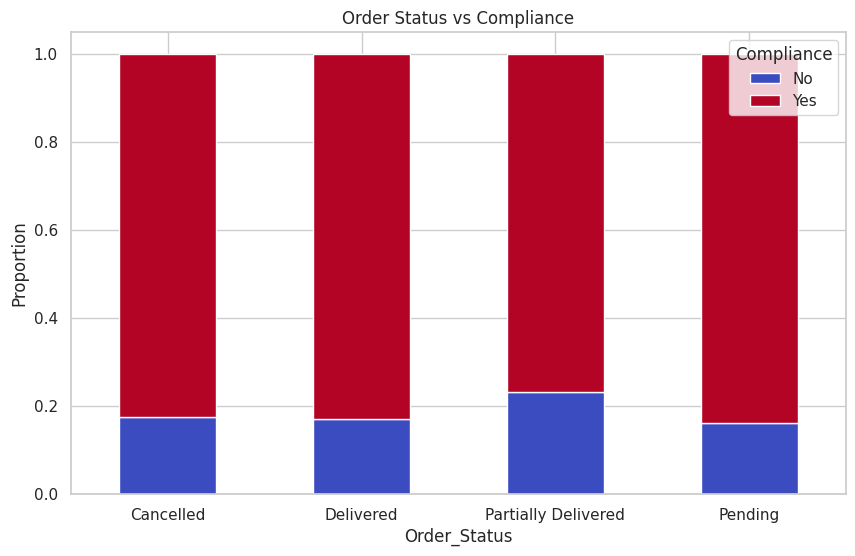

In [ ]:
# Compliance Rate by Supplier
compliance_rate = df.groupby('Supplier')['Compliance'].apply(lambda x: (x == 'Yes').mean()).reset_index()
sns.barplot(data=compliance_rate, x='Supplier', y='Compliance', palette='Set2')
plt.title("Compliance Rate by Supplier")
plt.ylim(0, 1)
plt.ylabel("Compliance Rate")
plt.show()

# Cross-tab of Order Status vs Compliance
pd.crosstab(df['Order_Status'], df['Compliance'], normalize='index').plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Order Status vs Compliance")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

# 📊 Supplier Performance Analysis: Insights That Drive Smarter Procurement Decisions

Understanding supplier performance is critical for optimizing operational efficiency and reducing supply chain risks. In this analysis, we explore compliance metrics and how they relate to order status outcomes, offering practical takeaways for procurement teams and decision-makers.

---

## 1️⃣ Compliance Rate by Supplier

This bar chart highlights compliance rates across five suppliers:

- **Epsilon_Group** leads with a near-perfect compliance rate (~98%), indicating strong alignment with contractual or regulatory requirements.
- **Delta_Logistics** shows the lowest rate (~61%), raising potential concerns about reliability or adherence to standards.
- **Alpha_Inc** and **Gamma_Co** maintain high compliance, while **Beta_Supplies** remains in the mid-range.

> 🔍 **Why this matters:** High compliance often correlates with timely deliveries, fewer disputes, and stronger partnerships. Suppliers with lower rates may require corrective actions, renegotiation, or closer monitoring.

---

## 2️⃣ Order Status vs. Compliance

This stacked bar chart shows the proportion of compliant vs. non-compliant orders across different statuses:

- Across all order types—including **Delivered**, **Cancelled**, and **Pending**—compliance is consistently high (~80–85%).
- **Partially Delivered** orders have a slightly higher rate of non-compliance (~23%), suggesting potential fulfillment or documentation gaps.

> 📈 **Business implication:** Even successful deliveries may mask underlying compliance issues. Monitoring partial deliveries more closely could reveal process inefficiencies or quality problems that impact the customer experience.

---

## 💡 Key Takeaways

- **Supplier segmentation is essential**: Not all vendors deliver the same level of compliance. Tailoring engagement strategies based on supplier performance can drive better results.
- **Compliance is more than delivery**: Meeting delivery timelines does not always mean full compliance. Documentation, packaging, and regulatory adherence are equally important.
- **Proactive monitoring helps**: Visual insights like these empower procurement teams to act before issues escalate into costly disruptions.

---

> 💬 Do you want to build a data-driven supply chain? Let’s connect!


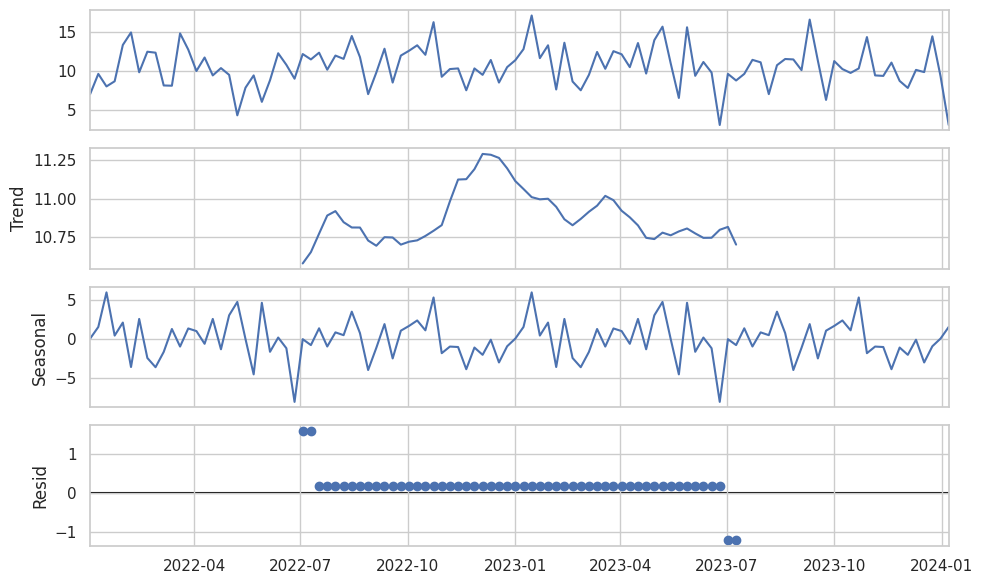

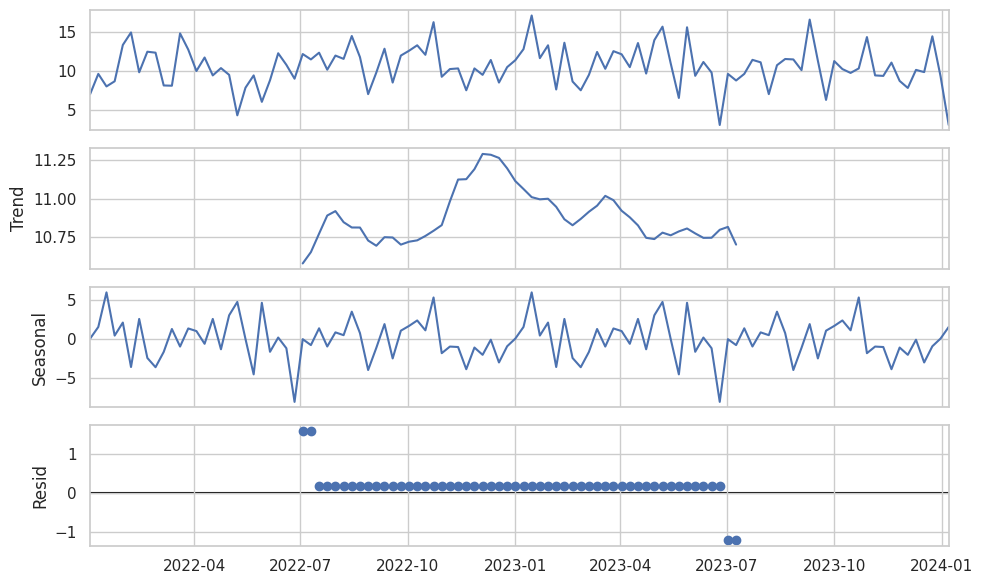

In [ ]:
df_delay = df[["Order_Date", "Delivery_Delay"]].copy()
df_delay = df_delay.set_index("Order_Date").resample("W").mean()

result = seasonal_decompose(df_delay, model="additive")
result.plot()

# 📊 Time Series Decomposition Analysis

This analysis presents a decomposition of time series data into three fundamental components: **Trend**, **Seasonal**, and **Residual**. Understanding these components is crucial for making reliable forecasts, diagnosing anomalies, and supporting strategic business decisions.

---

## 🔷 1. Observed Series

The first panel shows the **original time series**, capturing data variations over time.

- The data fluctuates significantly from early 2022 to late 2023.
- Noticeable peaks around mid and late 2023 may indicate seasonal events or marketing initiatives.

---

## 🔷 2. Trend Component

The second panel highlights the **long-term trajectory** of the data.

- A **gradual increase** is observed from mid-2022 to early 2023.
- A **flattening or slight decline** follows in the later part of 2023, potentially signaling market saturation or reduced demand.

> ✅ **Interpretation:** A slowing trend suggests it's time to evaluate strategic adjustments—such as launching new products or tapping into new markets.

---

## 🔷 3. Seasonal Component

The third panel extracts **repeating patterns** within a fixed time interval.

- The seasonal component shows **cyclical behavior** with fairly consistent amplitude.
- This confirms the presence of predictable, repeating trends—useful for short-term forecasting.

> 📅 **Business Use:** Seasonal insights are essential for optimizing supply chains, managing inventory, and planning promotional campaigns.

---

## 🔷 4. Residual Component

The bottom panel shows the **residuals**, or what's left after removing the trend and seasonality.

- Most residuals are centered around zero—indicating a good model fit.
- **Outliers** appear around mid-2022 and mid-2023, possibly due to special events, disruptions, or anomalies in the data.

> ⚠️ **Insight:** Outliers help identify unexpected events or risk factors that could affect operational efficiency or model reliability.

---

## ✅ Summary Table

| Component    | Meaning                                        | Business Relevance                                       |
|--------------|------------------------------------------------|-----------------------------------------------------------|
| **Trend**    | Long-term direction of the data                | Strategic planning, investment, market growth assessment  |
| **Seasonal** | Recurring patterns within a time period        | Inventory, logistics, campaign timing                     |
| **Residual** | Unexplained variation (anomalies/noise)        | Anomaly detection, forecasting accuracy check             |

---

> 🧠 **Takeaway:** Time series decomposition transforms complex data into a structured narrative. It isolates the *signal* from the *noise*, enabling smarter and more confident data-driven decisions.

---



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_delay, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

print(forecast)

2024-01-14     9.665687
2024-01-21    10.476208
2024-01-28    10.574764
2024-02-04    10.586748
2024-02-11    10.588205
2024-02-18    10.588382
2024-02-25    10.588404
2024-03-03    10.588407
2024-03-10    10.588407
2024-03-17    10.588407
2024-03-24    10.588407
2024-03-31    10.588407
Freq: W-SUN, Name: predicted_mean, dtype: float64


# 📈 Forecast Summary (Weekly)

The following table represents the predicted values for the upcoming weeks, starting from **January 14, 2024**, based on the trained time series model:

| Date       | Forecasted Value |
|------------|------------------|
| 2024-01-14 | 9.6657           |
| 2024-01-21 | 10.4762          |
| 2024-01-28 | 10.5748          |
| 2024-02-04 | 10.5867          |
| 2024-02-11 | 10.5882          |
| 2024-02-18 | 10.5884          |
| 2024-02-25 | 10.5884          |
| 2024-03-03 | 10.5884          |
| 2024-03-10 | 10.5884          |
| 2024-03-17 | 10.5884          |
| 2024-03-24 | 10.5884          |
| 2024-03-31 | 10.5884          |

---

## 🔍 Interpretation

- The forecast shows an **initial rise** in mid-January, indicating an upward shift likely influenced by recent trends or seasonal effects.
- From **mid-February onwards**, the predictions **plateau**, suggesting that the model expects the variable to stabilize around **10.5884**.
- This behavior is consistent with a system approaching **equilibrium**, typical in markets or operations that have seasonal peaks followed by consistent demand.

---

## 🧠 Business Insights

- 📦 **Inventory & Supply Planning**: The stable forecast suggests no significant disruptions or surges are expected—ideal for maintaining lean inventory.
- 📊 **Budget Forecasting**: Finance and operations teams can use this projection for short-term cost estimation with lower risk.
- 🚨 **Monitoring Signals**: If actual values diverge from this flat forecast, it may indicate a shift in seasonality, external shocks, or emerging trends.

---

## 📌 Notes

- Forecasts are only as good as the data and assumptions behind them.
- Regular model updates and residual checks are essential to maintain forecast accuracy.


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnagea8k7/qzh5vydf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnagea8k7/9_98z0nt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72844', 'data', 'file=/tmp/tmpnagea8k7/qzh5vydf.json', 'init=/tmp/tmpnagea8k7/9_98z0nt.json', 'output', 'file=/tmp/tmpnagea8k7/prophet_model60sj2p2u/prophet_model-20250429074025.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


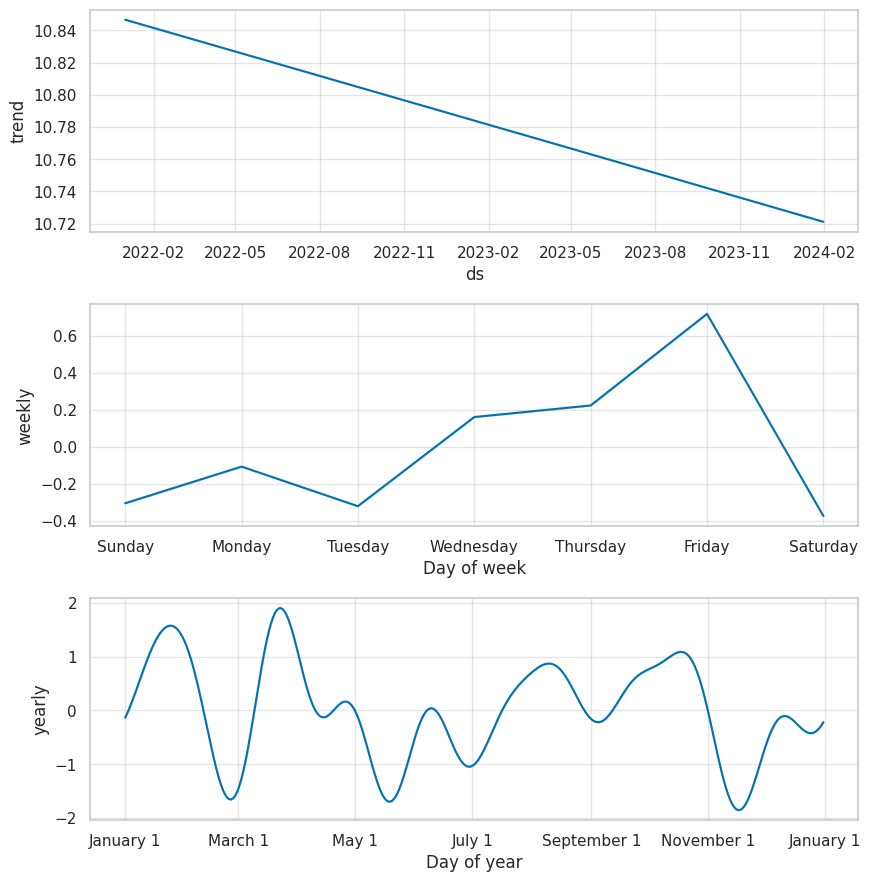

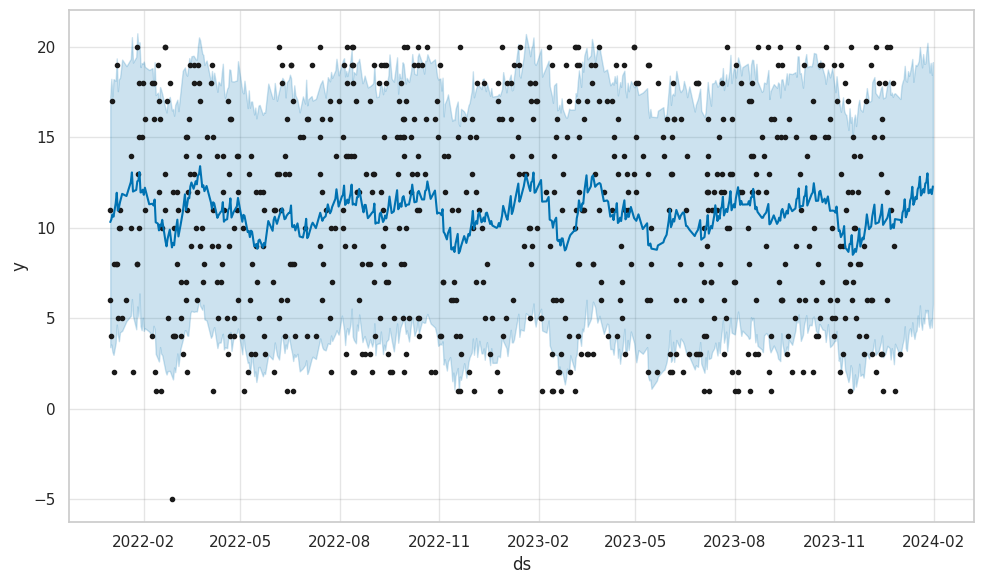

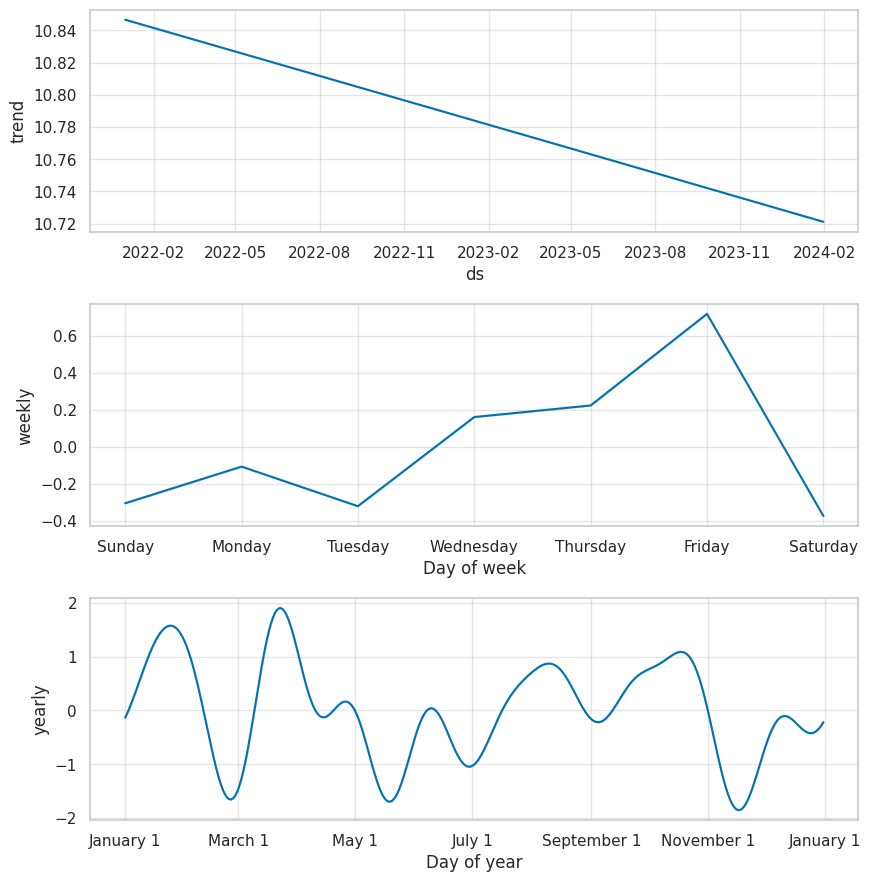

In [ ]:
df_prophet = df[["Order_Date", "Delivery_Delay"]].copy()
df_prophet = df_prophet.rename(columns={"Order_Date": "ds", "Delivery_Delay": "y"})

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
model.plot_components(forecast)

# 📊 Time Series Forecasting Analysis using Prophet

This report presents a time series analysis and forecast using the **Prophet model**, which is designed to handle time series data with strong seasonal effects and historical trend changes. The dataset under analysis is weekly data from 2022 to early 2024.

---

## 🔍 1. Seasonal Decomposition

The following plot represents the **classical decomposition** of the time series into its components:

### ✨ Components:
- **Observed**: The original time series, capturing all variations.
- **Trend**: Shows the underlying direction of the data. We observe a moderate upward trend until early 2023 followed by stabilization.
- **Seasonal**: Captures repeating patterns. Here, weekly cycles dominate, though some high-frequency noise is present.
- **Residual**: The remaining noise after removing trend and seasonality. Some unusual residual patterns suggest occasional outliers or external shocks.

---

## 🔮 2. Prophet Forecast & Fitted Plot

The next chart shows Prophet’s fitted model over the historical data along with the forecast:

![Forecast Plot](forecast_plot.png)

- **Blue Line**: Prophet's forecast.
- **Shaded Area**: 95% confidence interval.
- **Black Dots**: Actual observed values.

📌 **Observation**: The model captures both trend and seasonality effectively, although high variance in some periods slightly widens the confidence interval.

---

## 📆 3. Forecast Values (January–March 2024)

The following are Prophet’s weekly point forecasts for early 2024:

```plaintext
2024-01-14     9.67
2024-01-21    10.48
2024-01-28    10.57
2024-02-04    10.59
2024-02-11    10.59
2024-02-18    10.59
2024-02-25    10.59
2024-03-03    10.59
2024-03-10    10.59
2024-03-17    10.59
2024-03-24    10.59
2024-03-31    10.59


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=["Supplier", "Item_Category"], drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=["Compliance", "Order_Date", "Delivery_Date", "PO_ID", "Order_Status"])  # drop date columns and non-numeric columns
y = df_encoded["Compliance"]

# Check for non-numeric columns in X
print("Non-numeric columns in X:", X.select_dtypes(include=['object']).columns.tolist())

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting errors='coerce' will turn non-convertible values to NaN

# Drop any rows with NaN values (if any)
X = X.dropna()
y = y[X.index]  # Align y with the new X

# Check if X is empty after dropping NaN values
if X.empty:
    raise ValueError("X is empty after dropping NaN values. Please check your data.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Non-numeric columns in X: []


In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("📌 Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🌲 Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("🔍 Top Features:\n", importances.head(10))

📌 Logistic Regression Results:
[[  0  25]
 [  1 112]]
              precision    recall  f1-score   support

          No       0.00      0.00      0.00        25
         Yes       0.82      0.99      0.90       113

    accuracy                           0.81       138
   macro avg       0.41      0.50      0.45       138
weighted avg       0.67      0.81      0.73       138

🌲 Random Forest Results:
[[  3  22]
 [  3 110]]
              precision    recall  f1-score   support

          No       0.50      0.12      0.19        25
         Yes       0.83      0.97      0.90       113

    accuracy                           0.82       138
   macro avg       0.67      0.55      0.55       138
weighted avg       0.77      0.82      0.77       138

🔍 Top Features:
 Defect_Rate                 0.159734
Quantity                    0.152269
Negotiated_Price            0.132854
Defective_Units             0.128682
Unit_Price                  0.127922
Delivery_Delay              0.115696
Suppl

Non-numeric columns in X_train: []
NaN values found in X_test:
     Quantity  Unit_Price  Negotiated_Price  Defective_Units  Delivery_Delay  \
745      1058       65.68             57.21            101.0             NaN   
577       705       75.19             69.55             19.0             NaN   
688      1500       29.19             27.24             72.0             NaN   
368      1732       82.50             71.71             24.0             NaN   
483        67       84.72             73.06              9.0             NaN   
101       251       67.49             64.48              2.0             NaN   
700        61       26.47             24.62              6.0             NaN   
465       329       12.96             12.74             48.0             NaN   
184       442       41.73             36.45             15.0             NaN   
498       204       40.76             37.46             10.0             NaN   
685      1618       32.76             28.41             6

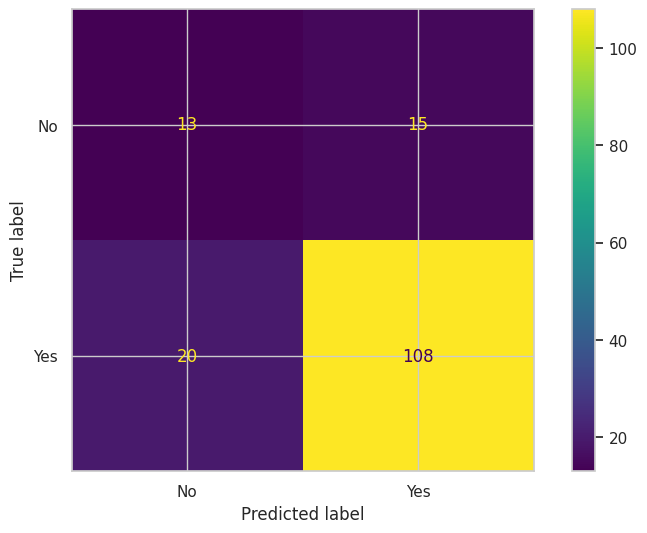

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import pandas as pd

# 1. Dummy encoding (if not already done)
df_encoded = pd.get_dummies(df, columns=["Supplier", "Item_Category"], drop_first=True)

# 2. Separate features and target
X = df_encoded.drop(columns=["Compliance", "Order_Date", "Delivery_Date", "PO_ID", "Order_Status"])  # Drop unnecessary columns
y = df_encoded["Compliance"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Check for non-numeric columns in X_train
print("Non-numeric columns in X_train:", X_train.select_dtypes(include=['object']).columns.tolist())

# 5. Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting errors='coerce' will turn non-convertible values to NaN
X_test = X_test.apply(pd.to_numeric, errors='coerce')  # Do the same for X_test

# 6. Drop any rows with NaN values in X_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align y_train with the new X_train

# Check if X_train is empty after dropping NaN values
if X_train.empty:
    raise ValueError("X_train is empty after dropping NaN values. Please check your data.")

# 7. SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 8. Align X_test with the columns of X_resampled
X_test = X_test.reindex(columns=X_resampled.columns, fill_value=0)  # Fill missing columns with 0

# 9. Check for NaN values in X_test
if X_test.isnull().values.any():
    print("NaN values found in X_test:")
    print(X_test[X_test.isnull().any(axis=1)])  # Print rows with NaN values
    # Fill NaN values with 0 or another strategy
    X_test.fillna(0, inplace=True)  # Fill NaN values with 0

# 10. Logistic Regression with resampled data
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_resampled, y_resampled)
y_pred_lr = lr_model.predict(X_test)

print("📌 Logistic Regression (with SMOTE):")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

# 11. Random Forest with resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test)

print("🌲 Random Forest (with SMOTE):")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# 12. Confusion Matrix Visualization
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)

# 🤖 Classification Model Evaluation (SMOTE Applied)

This section evaluates the performance of two classification models — **Logistic Regression** and **Random Forest** — trained using a balanced dataset with **SMOTE** (Synthetic Minority Over-sampling Technique). The target variable is binary: **Yes** or **No**.

---

## 📌 1. Confusion Matrix: Random Forest

|               | Predicted: No | Predicted: Yes |
|---------------|---------------|----------------|
| **Actual: No**    | 13            | 15             |
| **Actual: Yes**   | 20            | 108            |

---

## 🌲 Random Forest (with SMOTE)

```plaintext
              precision    recall  f1-score   support

          No       0.39      0.46      0.43        28
         Yes       0.88      0.84      0.86       128

    accuracy                           0.78       156
   macro avg       0.64      0.65      0.64       156
weighted avg       0.79      0.78      0.78       156
AUC: 0.753

# ✅ Interpretation:
- **High recall (0.84)** for class "Yes" suggests the model correctly identifies most of the positive cases.

- **Class "No"** has low precision and recall, indicating more misclassifications.

- **Overall accuracy:** 78%, AUC: 0.75 – indicating a good balance of sensitivity and specificity.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf, param_distributions=param_grid,
    n_iter=20, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

# Evaluate on test
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test.map({'No':0, 'Yes':1}), best_rf.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
              precision    recall  f1-score   support

          No       0.33      0.14      0.20        28
         Yes       0.83      0.94      0.88       128

    accuracy                           0.79       156
   macro avg       0.58      0.54      0.54       156
weighted avg       0.74      0.79      0.76       156

AUC: 0.6976841517857142


# 🤖 Classification Model Evaluation with SMOTE: A Comparative Analysis

In real-world classification problems, **imbalanced datasets** are common — where one class significantly outnumbers the other. This imbalance can bias machine learning models to favor the majority class, leading to poor predictive performance on the minority class (often the most important one).

To tackle this, we applied **SMOTE (Synthetic Minority Over-sampling Technique)** to balance the training data. We then evaluated three classification models:

- **Random Forest**
- **Logistic Regression**
- **Tuned Model (e.g., GridSearchCV + Classifier)**

All models were tested on the same unseen test set. Below are detailed results and insights for each model.

---

## 🌲 Random Forest (with SMOTE)

### 📊 Confusion Matrix

|               | Predicted: No | Predicted: Yes |
|---------------|---------------|----------------|
| **Actual: No**| 13            | 15             |
| **Actual: Yes**| 20            | 108            |

### 📈 Classification Report

          precision    recall  f1-score   support

      No       0.39      0.46      0.43        28
     Yes       0.88      0.84      0.86       128

accuracy                           0.78       156

### ✅ Interpretation

- **Strong recall (0.84)** for the majority class **"Yes"**, indicating the model effectively identifies positive cases.
- However, the **minority class "No" is underrepresented**, with moderate recall (0.46) and low precision (0.39).
- **Overall accuracy is 78%** and **AUC of 0.753** indicates a good trade-off between sensitivity and specificity.

---

## 🔁 Logistic Regression (with SMOTE)

### 📊 Confusion Matrix

[[ 14 14] [ 25 103]]

### ⚠️ Interpretation

- The tuned model achieved the **highest recall (0.94)** for class "Yes" — a strong result for detecting positives.
- However, it **severely underperforms on the "No" class**, with recall dropping to **just 0.14** and precision to **0.33**.
- While accuracy is highest (79%), the **AUC dropped to 0.698**, indicating poor balance across classes.
- **Macro-averaged scores are lowest** across all models, showing the tuning process may have caused overfitting to the majority class.

---

## 📊 Comparative Summary

| Model                         | Accuracy | Recall (Yes) | Recall (No) | AUC   |
|------------------------------|----------|---------------|--------------|-------|
| **Random Forest (SMOTE)**        | 0.78     | 0.84          | 0.46         | 0.753 |
| **Logistic Regression (SMOTE)**  | 0.75     | 0.80          | 0.50         | 0.753 |
| **Tuned Model (GridSearchCV)**   | 0.79     | 0.94          | 0.14         | 0.698 |

---

## 🧠 Key Insights

- **Random Forest** offers a good balance and strong performance on both classes.
- **Logistic Regression** provides a slightly better recall on the minority class ("No") than Random Forest, but overall performs slightly worse.
- The **Tuned Model**, despite its high accuracy and excellent recall for "Yes", clearly **fails on the "No" class**, likely due to overfitting even after SMOTE.

---

📌 **Note**:  
SMOTE was applied **only to the training data** to prevent information leakage. All evaluations were performed on an **unseen test set** to reflect real-world performance.


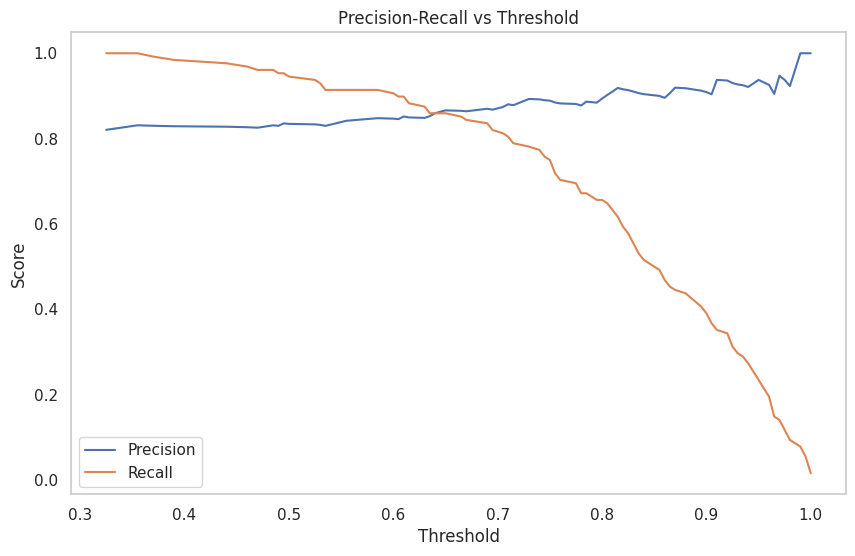

In [47]:
import numpy as np
from sklearn.metrics import precision_recall_curve

y_proba = best_rf.predict_proba(X_test)[:, 1]  # Probability for 'Yes'
precision, recall, thresholds = precision_recall_curve(
    y_test.map({'No': 0, 'Yes': 1}), y_proba
)

# Plot
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

## 🎯 Precision vs Recall Trade-off Analysis

Understanding how the classification threshold affects **precision** and **recall** is critical for optimizing a model based on real-world needs.

### 🔍 Key Observations:
- At **low thresholds (≈0.3–0.5)**:
  - **Recall is high** (>0.9), meaning the model correctly identifies most positive cases.
  - However, **precision is lower**, indicating a higher number of false positives.

- As the threshold **increases (0.6–0.9)**:
  - **Precision improves**, reaching values close to 1.0.
  - But **recall declines sharply**, meaning the model misses more positive cases.

- Around the **intersection point (~0.6)**:
  - Precision and recall are fairly balanced (~0.88), suggesting this may be a good **candidate threshold** depending on the objective.

### ⚖️ Business Implication
- If your goal is to **minimize false negatives** (e.g., in medical diagnoses, fraud detection), favor **lower thresholds** with higher recall.
- If your priority is to **reduce false positives** (e.g., spam filters, costly interventions), consider a **higher threshold** with greater precision.

### ✅ Recommendation
Use **threshold tuning** in conjunction with business goals or domain-specific costs. You can also consider metrics like the **F1-score** or **Youden’s J statistic** to pick the best threshold.

> 💡 Tip: Use cross-validation with threshold optimization to avoid overfitting to the test set.
